In [1]:
from GmGM.synthetic import DatasetGenerator
from GmGM.synthetic import PrecMatGenerator, PrecMatErdosRenyiGilbert
from GmGM.synthetic import measure_prec_recall, plot_prec_recall
from GmGM import GmGM
from TeraLasso import TeraLasso
from EiGLasso import EiGLasso

from statistics import median
import numpy as np

## 2-axis normal

In [2]:
generator = DatasetGenerator(
    structure={
        "dataset": ("axis_0", "axis_1"),
    },
    generator={
        "axis_0": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
        "axis_1": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
    },
    size={
        "axis_0": 50,
        "axis_1": 50,
    },
)
generator

<DatasetGenerator, structure=
	dataset: ('', 'axis_0', 'axis_1')
size=
	axis_0: 50
	axis_1: 50
generator=
	axis_0: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
	axis_1: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
axis_join=
	Kronecker Sum
distribution=
	dataset: <Normal Distribution>
>

Attempt 1/5


Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


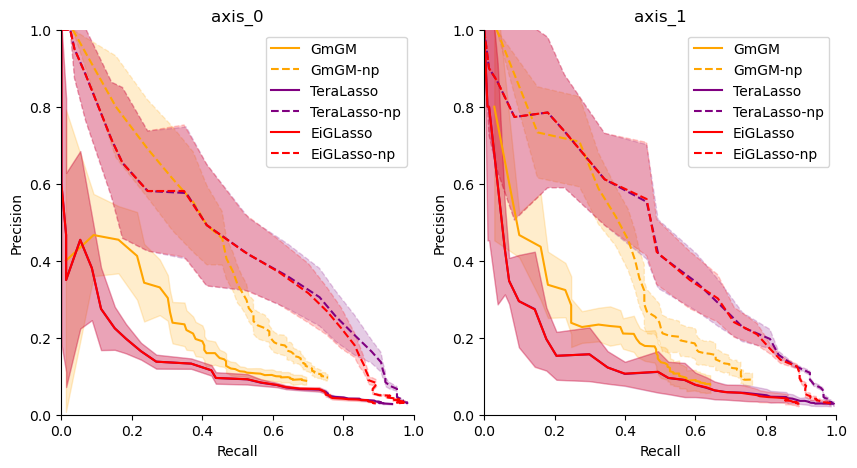

In [3]:
nlambdas = 50
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-np": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", use_nonparanormal_skeptic=True),
        "TeraLasso": lambda dataset, lambdas: TeraLasso(dataset, lambdas),
        "TeraLasso-np": lambda dataset, lambdas: TeraLasso(dataset, lambdas, use_nonparanormal_skeptic=True),
        "EiGLasso": lambda dataset, lambdas: EiGLasso(dataset, lambdas, lambdas),
        "EiGLasso-np": lambda dataset, lambdas: EiGLasso(dataset, lambdas, lambdas, use_nonparanormal_skeptic=True),
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, nlambdas),
        "GmGM-np": np.linspace(0.001, 0.2, nlambdas),
        "TeraLasso": 10**np.linspace(-2, 0, nlambdas),
        "TeraLasso-np": 10**np.linspace(-5, -3, nlambdas),
        "EiGLasso": 10**np.linspace(-2, 0, nlambdas),
        "EiGLasso-np": 10**np.linspace(-5, -3, nlambdas),
    },
    num_attempts=5,
    num_samples=1,
    verbose=1,
    fail_gracefully=False
)
plot_prec_recall(
    results,
    figsize=(10, 5),
    color={
        "GmGM": "orange",
        "GmGM-np": "orange",
        "TeraLasso": "purple",
        "TeraLasso-np": "purple",
        "EiGLasso": "red",
        "EiGLasso-np": "red",
    },
    linestyle={
        "GmGM": "-",
        "GmGM-np": "--",
        "TeraLasso": "-",
        "TeraLasso-np": "--",
        "EiGLasso": "-",
        "EiGLasso-np": "--",
    }
)
pass

## 3-axis normal

In [16]:
generator = DatasetGenerator(
    structure={
        "dataset": ("axis_0", "axis_1", "axis_2"),
    },
    generator={
        "axis_0": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
        "axis_1": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
        "axis_2": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
    },
    size={
        "axis_0": 50,
        "axis_1": 50,
        "axis_2": 50,
    },
)
generator

<DatasetGenerator, structure=
	dataset: ('', 'axis_0', 'axis_1', 'axis_2')
size=
	axis_0: 50
	axis_1: 50
	axis_2: 50
generator=
	axis_0: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
	axis_1: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
	axis_2: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
axis_join=
	Kronecker Sum
distribution=
	dataset: <Normal Distribution>
>

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


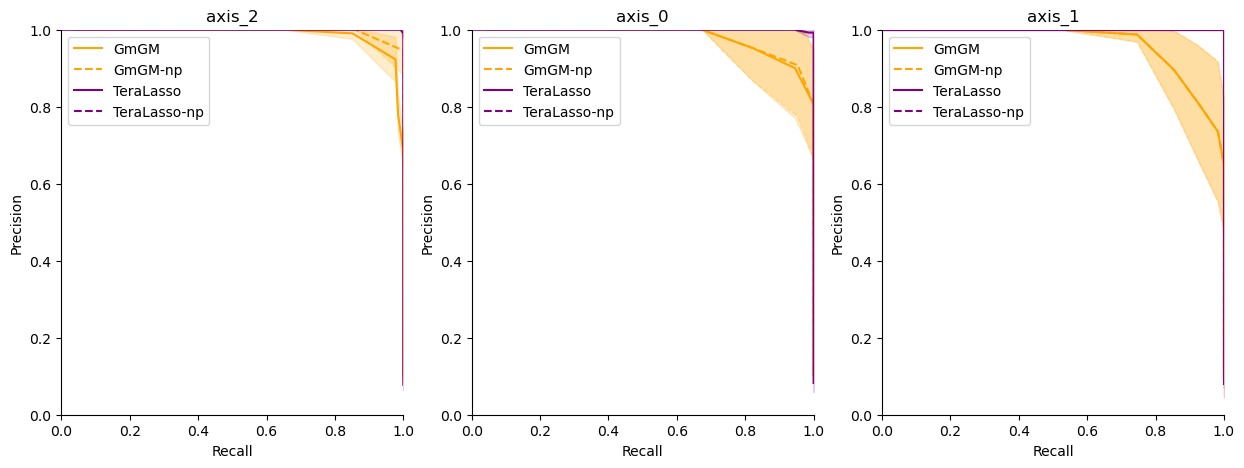

In [17]:
nlambdas = 50
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-np": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", use_nonparanormal_skeptic=True),
        "TeraLasso": lambda dataset, lambdas: TeraLasso(dataset, lambdas),
        "TeraLasso-np": lambda dataset, lambdas: TeraLasso(dataset, lambdas, use_nonparanormal_skeptic=True),
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, nlambdas),
        "GmGM-np": np.linspace(0.001, 0.2, nlambdas),
        "TeraLasso": 10**np.linspace(-2, 0, nlambdas),
        "TeraLasso-np": 10**np.linspace(-5, -3, nlambdas),
    },
    num_attempts=5,
    num_samples=1,
    verbose=1,
    fail_gracefully=False
)
plot_prec_recall(
    results,
    figsize=(15, 5),
    color={
        "GmGM": "orange",
        "GmGM-np": "orange",
        "TeraLasso": "purple",
        "TeraLasso-np": "purple",
    },
    linestyle={
        "GmGM": "-",
        "GmGM-np": "--",
        "TeraLasso": "-",
        "TeraLasso-np": "--",
    }
)
pass

## 2-axis ziln

In [18]:
from GmGM.synthetic import ZiLNDistribution
generator = DatasetGenerator(
    structure={
        "dataset": ("axis_0", "axis_1"),
    },
    generator={
        "axis_0": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
        "axis_1": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
    },
    size={
        "axis_0": 50,
        "axis_1": 50,
    },
    distribution=ZiLNDistribution(np.random.uniform(size=(50)).reshape(1, 50))
)
generator

<DatasetGenerator, structure=
	dataset: ('', 'axis_0', 'axis_1')
size=
	axis_0: 50
	axis_1: 50
generator=
	axis_0: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
	axis_1: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
axis_join=
	Kronecker Sum
distribution=
	dataset: <ZiLN Distribution, truncation=[[0.36049991 0.07828732 0.82747217 0.88614043 0.17375868 0.77483505
  0.96338271 0.94269912 0.32587062 0.23566916 0.37484348 0.7478258
  0.95086781 0.77503578 0.84194946 0.22974727 0.38778944 0.50458843
  0.97469335 0.24892355 0.83765506 0.70888086 0.95555397 0.83240201
  0.21945414 0.84186993 0.69141719 0.24748969 0.64696269 0.13041867
  0.66955686 0.2468001  0.56098354 0.8258396  0.95247046 0.67122511
  0.19681647 0.03357797 0.26915572 0.60495781 0.54647801 0.01575274
  0.41941797 0.1478126  0.17883696 0.45150936 0.49600928 0.90362069
  0.74300079 0.77798765]]>
>

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


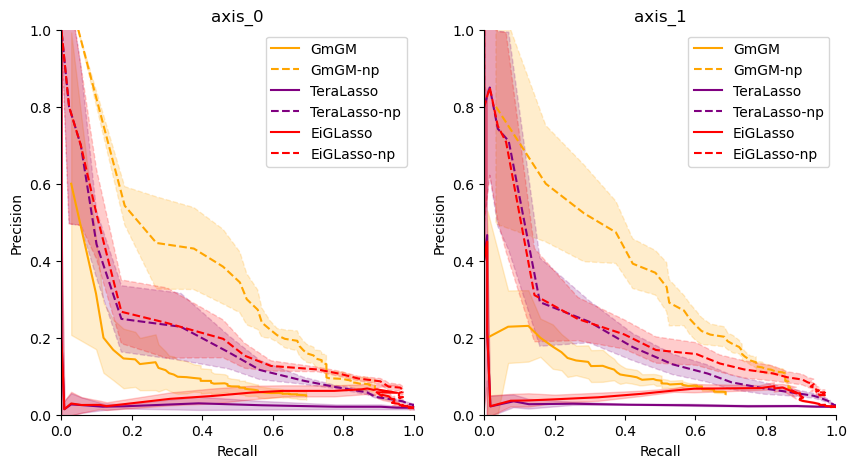

In [19]:
nlambdas = 50
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-np": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", use_nonparanormal_skeptic=True),
        "TeraLasso": lambda dataset, lambdas: TeraLasso(dataset, lambdas),
        "TeraLasso-np": lambda dataset, lambdas: TeraLasso(dataset, lambdas, use_nonparanormal_skeptic=True),
        "EiGLasso": lambda dataset, lambdas: EiGLasso(dataset, lambdas, lambdas),
        "EiGLasso-np": lambda dataset, lambdas: EiGLasso(dataset, lambdas, lambdas, use_nonparanormal_skeptic=True),
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.25, nlambdas),
        "GmGM-np": np.linspace(0.001, 0.25, nlambdas),
        "TeraLasso": 10**np.linspace(-2, 1, nlambdas),
        "TeraLasso-np": 10**np.linspace(-5, -3, nlambdas),
        "EiGLasso": 10**np.linspace(-2, 1, nlambdas),
        "EiGLasso-np": 10**np.linspace(-5, -3, nlambdas),
    },
    num_attempts=5,
    num_samples=1,
    verbose=1,
    fail_gracefully=False
)
plot_prec_recall(
    results,
    figsize=(10, 5),
    color={
        "GmGM": "orange",
        "GmGM-np": "orange",
        "TeraLasso": "purple",
        "TeraLasso-np": "purple",
        "EiGLasso": "red",
        "EiGLasso-np": "red",
    },
    linestyle={
        "GmGM": "-",
        "GmGM-np": "--",
        "TeraLasso": "-",
        "TeraLasso-np": "--",
        "EiGLasso": "-",
        "EiGLasso-np": "--",
    }
)
pass

## 2-modality, 1 shared normal

In [20]:
generator = DatasetGenerator(
    structure={
        "dataset_0": ("axis_0", "shared"),
        "dataset_1": ("axis_1", "shared"),
    },
    generator={
        "axis_0": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
        "axis_1": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
        "shared": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
    },
    size={
        "axis_0": 50,
        "axis_1": 50,
        "shared": 50,
    },
)
generator

<DatasetGenerator, structure=
	dataset_0: ('', 'axis_0', 'shared')
	dataset_1: ('', 'axis_1', 'shared')
size=
	axis_0: 50
	axis_1: 50
	shared: 50
generator=
	axis_0: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
	axis_1: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
	shared: <PrecMatGenerator, core=coreless, mask=PrecMatErdosRenyiGilbert(edge_probability=0.02)>
axis_join=
	Kronecker Sum
distribution=
	dataset_0: <Normal Distribution>
	dataset_1: <Normal Distribution>
>

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


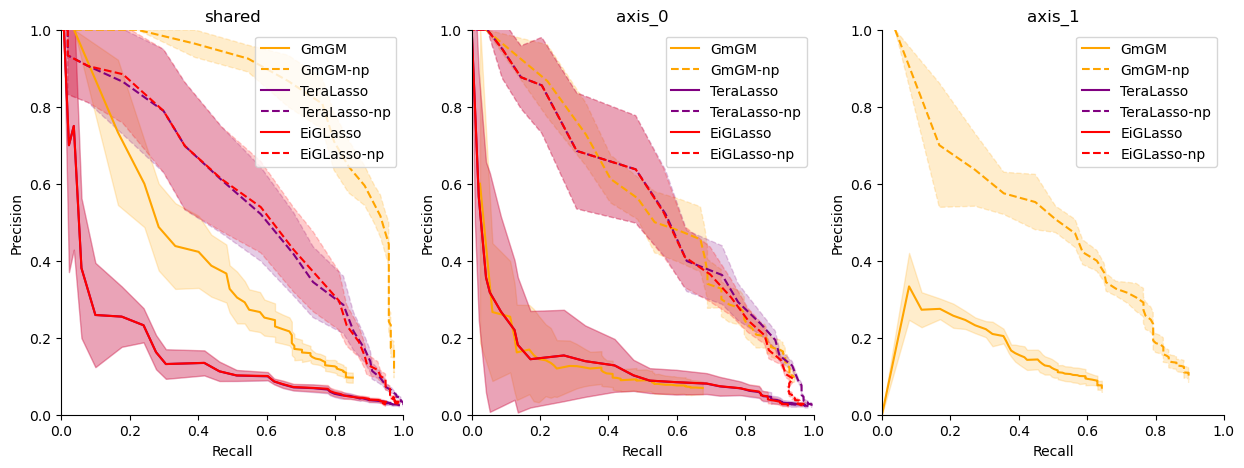

In [21]:
nlambdas = 50
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-np": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall", use_nonparanormal_skeptic=True),
        "TeraLasso": lambda dataset, lambdas: TeraLasso(dataset["dataset_0"], lambdas),
        "TeraLasso-np": lambda dataset, lambdas: TeraLasso(dataset["dataset_0"], lambdas, use_nonparanormal_skeptic=True),
        "EiGLasso": lambda dataset, lambdas: EiGLasso(dataset["dataset_0"], lambdas, lambdas),
        "EiGLasso-np": lambda dataset, lambdas: EiGLasso(dataset["dataset_0"], lambdas, lambdas, use_nonparanormal_skeptic=True),
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 0.2, nlambdas),
        "GmGM-np": np.linspace(0.001, 0.2, nlambdas),
        "TeraLasso": 10**np.linspace(-2, 0, nlambdas),
        "TeraLasso-np": 10**np.linspace(-5, -3, nlambdas),
        "EiGLasso": 10**np.linspace(-2, 0, nlambdas),
        "EiGLasso-np": 10**np.linspace(-5, -3, nlambdas),
    },
    num_attempts=5,
    num_samples=1,
    verbose=1,
    fail_gracefully=False
)
plot_prec_recall(
    results,
    figsize=(15, 5),
    color={
        "GmGM": "orange",
        "GmGM-np": "orange",
        "TeraLasso": "purple",
        "TeraLasso-np": "purple",
        "EiGLasso": "red",
        "EiGLasso-np": "red",
    },
    linestyle={
        "GmGM": "-",
        "GmGM-np": "--",
        "TeraLasso": "-",
        "TeraLasso-np": "--",
        "EiGLasso": "-",
        "EiGLasso-np": "--",
    }
)
pass